In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

{1: [1, 5], 2: [8, 7], 3: [9, 2], 4: [8, 4]}


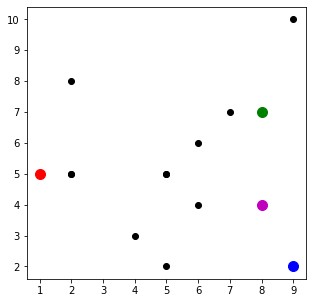

In [8]:
df = pd.DataFrame({
    'x':[7,2,5,2,5,2,6,4,5,6,9],
    'y':[7,5,5,5,5,8,6,3,2,4,10]
})

feature_num = len(df.columns)
np.random.seed(200)
k=4
centroids = {
    i+1:[np.random.randint(1,10), np.random.randint(1,10)]
    for i in range(k)
}

print(centroids)

# 畫圖

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color='k')
colmap = {1:'r',2:'g',3:'b',4:'m'}

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i],s=100)

plt.show()

In [3]:
def assignment(df, centroids, feature_num):  # 把 patterns 歸類到當前 center
    
    for i in centroids.keys():  # 額外加入自動化維度
        num=np.zeros(len(df))
        for j in range(feature_num):
            num += ((df[df.columns[j]] - centroids[i][j] ) ** 2).values
        df['distance_from_{}'.format(i)] = (np.sqrt(num))
        
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    # df.loc[A,B]: A 為欲取之列 (index)， B 為欲取之行 (column name)
    # axis=0:每個 column 中最小值對應到的 index，axis=1:每個 row 中最小值對應到的 column name
    df['cloest'] = df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['cloest'] = df['cloest'].map(lambda x:int(x.lstrip('distance_from_')))
#     df['color'] = df['cloest'].map(lambda x:colmap[x])
    return df

df = assignment(df,centroids)

#畫圖

print(df)
print(centroids)
fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'], df['y'], color=df['color'], alpha=0.5,
            edgecolor='k')

plt.show()

In [4]:
import copy

old_centroids = copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        for j in range(feature_num):
            centroids[i][j] = np.mean(df[df['cloest'] == i][df.columns[j]])
    return k

centroids = update(centroids)

for i in centroids:  # preventing the missing center
    try:
        for j in centroids[i]:
            if int(j):
                pass
    except:
        print('若再執行一次第_{}個中心點會消失(nan)'.format(i))
        centroids = old_centroids
        break

print(centroids)
print(old_centroids)

# #畫圖

fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,
            edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i],s=100)

# 移動軌跡

for i in old_centroids.keys():
    old_x=old_centroids[i][0]
    old_y=old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * 0.75
    dy = (centroids[i][1] - old_centroids[i][1]) * 0.75
    ax.arrow(old_x,old_y,dx,dy,head_width=0.2,head_length=0.3,
             fc=colmap[i],ec=colmap[i])
plt.show()

In [5]:
df = assignment(df, centroids)

# # 畫圖

fig = plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,
            edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i],s=100)
plt.show()

若再執行一次第_3個中心點會消失(nan)
{1: [1, 5], 2: [8, 7], 3: [9, 2], 4: [8, 4]}


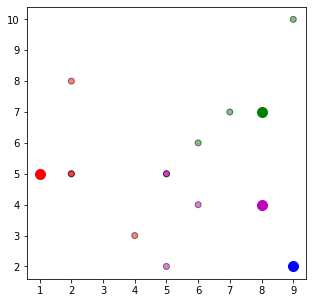

In [5]:
num=0
l=[]
while True:
    
    if num>10**4+10:  # whether getting shock so that the program keep going
        print(l)
        break
        
    else:
#         print(num)
#         print(df)
        num+=1
        df = assignment(df,centroids)
        old_centroids = copy.deepcopy(centroids)
        cloest_centroids = df['cloest'].copy(deep=True)
        centroids = update(centroids)
        
        for i in centroids:  # preventing the missing center
            try:
                for j in centroids[i]:
                    if int(j):
                        pass
            except:
                print('若再執行一次第_{}個中心點會消失(nan)'.format(i))
                centroids = old_centroids
                break
                    
        if cloest_centroids.equals(df['cloest']): # whether getting the same center after updating the center
            break
        elif num>10**4:  # whether getting shock so that the program keep going
            l.append(centroids)
        else:
            pass
        
print(centroids)

# 畫圖

fig = plt.figure(figsize=(5,5))

plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,
            edgecolor='k')

for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i],s=100)

    
plt.show()

# 程式總整理

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
from mpl_toolkits.mplot3d import Axes3D  # 畫三維圖
%matplotlib inline

# centroids = {??} #需手動設定初始 center

def assignment(df, centroids, feature_num):  # 把 patterns 歸類到當前 center
    
    for i in centroids.keys():  # 額外加入自動化維度
        num=np.zeros(len(df))
        for j in range(feature_num):
            num += ((df[df.columns[j]] - centroids[i][j] ) ** 2).values
        df['distance_from_{}'.format(i)] = (np.sqrt(num))
        
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    # df.loc[A,B]: A 為欲取之列 (index)， B 為欲取之行 (column name)
    # axis=0:每個 column 中最小值對應到的 index，axis=1:每個 row 中最小值對應到的 column name
    df['cloest'] = df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['cloest'] = df['cloest'].map(lambda x:int(x.lstrip('distance_from_')))
    df['color'] = df['cloest'].map(lambda x:colmap[x]) # 畫圖
    return df


def update(k, feature_num):
    for i in centroids.keys():
        for j in range(feature_num):
            centroids[i][j] = np.mean(df[df['cloest'] == i][df.columns[j]])
    return k


def main(df, random_seed, cluster_num, centroids):

    feature_num = len(df.columns)
    np.random.seed(random_seed)
    k=cluster_num
    num=0
    l=[]
    
    while True:

        if num>10**4+10:  # whether getting shock so that the program keep going
            print(l)
            break

        else:
            num+=1
            df = assignment(df,centroids, feature_num)
            old_centroids = copy.deepcopy(centroids)
            cloest_centroids = df['cloest'].copy(deep=True)
            centroids = update(centroids, feature_num)

            for i in centroids:  # preventing the missing center
                try:
                    for j in centroids[i]:
                        if int(j):
                            pass
                except:
                    print('若再執行一次第_{}個中心點會消失(nan)'.format(i))
                    centroids = old_centroids
                    break

            if cloest_centroids.equals(df['cloest']): # whether getting the same center after updating the center
                break
            elif num>10**4:  # whether getting shock so that the program keep going
                l.append(centroids)
            else:
                pass
            
    return centroids, df

### 實際資料(3維):想看類似的消費者有哪三群

In [38]:
df = pd.read_csv(r'C:\Users\jiao\Downloads\RFM - data.csv', index_col='客戶編號')

In [39]:
df.columns=pd.Index(['x','y','z'])

In [40]:
df.head()

,x,y,z
客戶編號,,,
1,387,0,0
2,470,0,0
3,269,1,214
4,149,1,400
5,416,0,0


{1: [282, 1, 784], 2: [324, 0, 5815], 3: [332, 1, 185]}


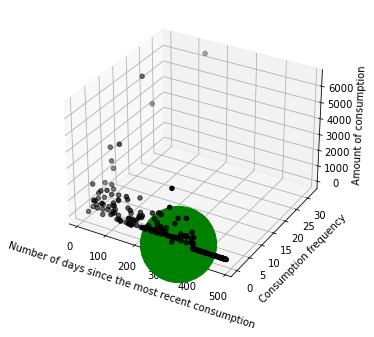

In [41]:
centroids = {
    i+1:[np.random.randint(0,500), np.random.randint(0,2), np.random.randint(0,6000)]
    for i in range(3)
}

print(centroids)

fig = plt.figure()
ax = Axes3D(fig)

colmap = {1:'r',2:'g',3:'b',4:'m'}

ax.scatter(df['x'],df['y'],df['z'],color='k')

for i in centroids.keys():
    plt.scatter(*centroids[i], color=colmap[i])

ax.set_xlabel('Number of days since the most recent consumption')
ax.set_ylabel('Consumption frequency')
ax.set_zlabel('Amount of consumption')
plt.show()

In [42]:
main(df, 200, 3, centroids)

({1: [139.6595744680851, 2.9361702127659575, 1036.0212765957447],
  2: [76.5, 19.5, 5229.75],
  3: [304.5838926174497, 0.7315436241610739, 116.19463087248322]},
         x  y    z  distance_from_1  distance_from_2  distance_from_3  cloest  \
 客戶編號                                                                           
 1     387  0    0       791.000632      5815.341263       193.005181       3   
 2     470  0    0       806.226395      5816.832557       230.802946       3   
 3     269  1  214       570.148226      5601.270124        69.354164       3   
 4     149  1  400       406.380364      5417.827147       282.336678       3   
 5     416  0    0       795.369725      5815.727727       203.179723       3   
 ...   ... ..  ...              ...              ...              ...     ...   
 196   305  0    0       784.337937      5815.031040       186.962563       3   
 197   378  0    0       789.856316      5815.250725       190.635778       3   
 198   262  1  159       625.

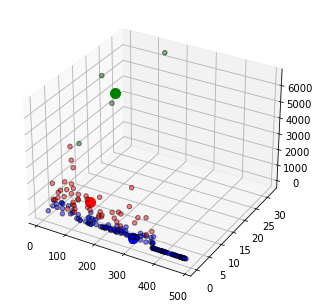

In [43]:
fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(df['x'],df['y'],df['z'],color=df['color'],alpha=0.5,
            edgecolor='k')
for i in centroids.keys():
    ax.scatter(*centroids[i],color=colmap[i],s=100)

plt.show()

In [44]:
# 把預測出之同類的整理維同一欄

cluster_result = pd.concat([pd.DataFrame({'第一群之客戶編號':df[df['color']=='r'].index}),
                  pd.DataFrame({'第二群之客戶編號':df[df['color']=='g'].index}),
                  pd.DataFrame({'第三群之客戶編號':df[df['color']=='b'].index})
                 ], axis=1)

In [45]:
# 存成 csv 檔
cluster_result.to_csv('C:/Users/jiao/Desktop/研究所/程式任務一/K_mean實作結果.csv', index=False, encoding="utf_8_sig")